# Pipelines

Ich code hier all meine Modelle im default und packe sie danach in einen Stacker. Dann vergleiche ich die Ergebnisse. 
Ggf. muss ich danach noch Parametertuning betreiben, wenn ich nur Schrott heraus bekomme. 

**Modelle:**

1. Lineare Regression
2. Elastic Net Regression
3. k-Nearest-Neighbors Regression
4. Random Forest Regression
5. Support Vector Regression
6. Stacker

C:\Users\test\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


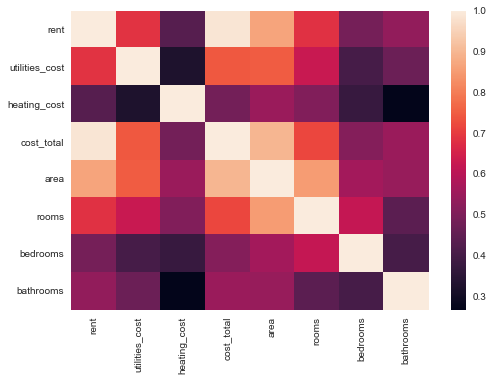

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from validation_metric import total_validation
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError


#load data
df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_preprocessed_test.csv")


_=sns.heatmap(df.iloc[:,1:9].corr())
plt.show()

# Drop 'cost_total' due to high correlation -> colliniarity?
df = df.drop('cost_total', axis=1)

# split data
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                 value
MAE              25.51
MAPE (%)         21.35
MSE            1196.49
RMSE (Units)     34.59
r-squared (%)    25.12


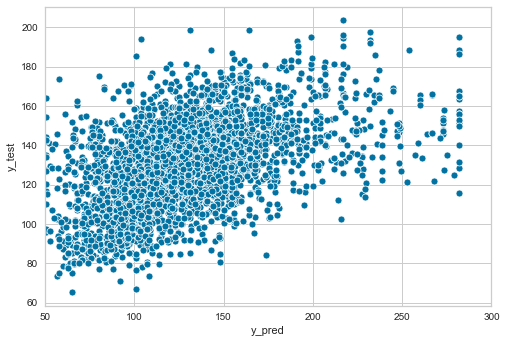

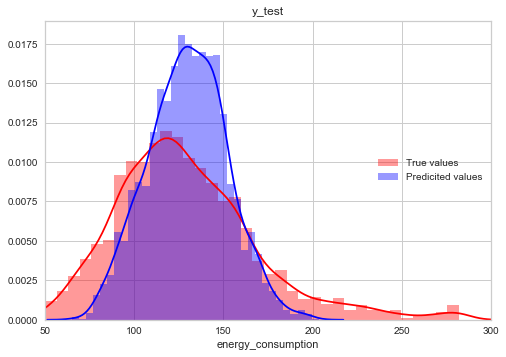

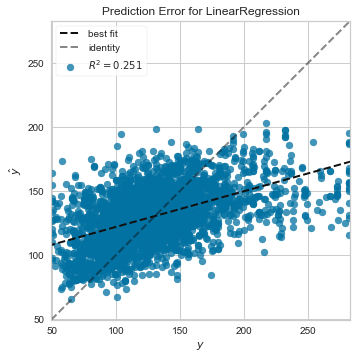

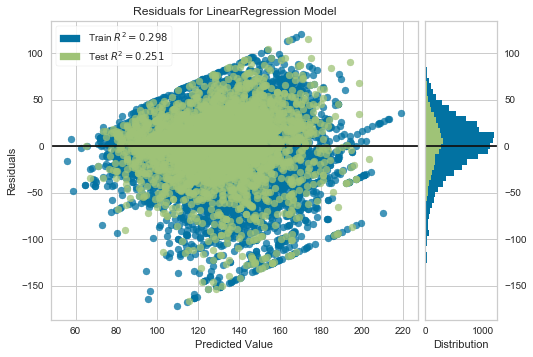

In [3]:
# LinReg:

from sklearn.linear_model import LinearRegression

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('LinReg', LinearRegression())]

pipeline = Pipeline(steps)

LinReg_scaled = pipeline.fit(X_train, y_train)
y_pred = LinReg_scaled.predict(X_test)

metric_LinReg = total_validation(y_test, y_pred)

print(metric_LinReg)


_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values') 
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                 value
MAE              29.18
MAPE (%)         24.97
MSE            1481.84
RMSE (Units)     38.49
r-squared (%)     7.26


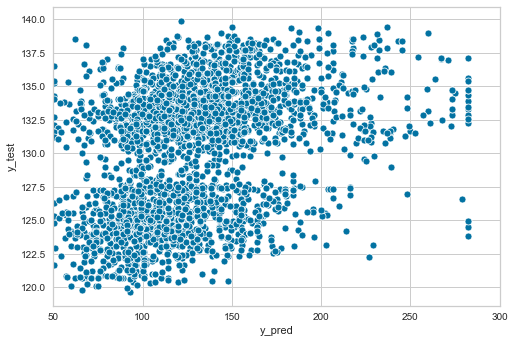

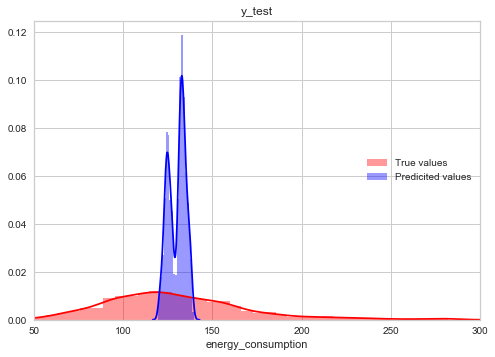

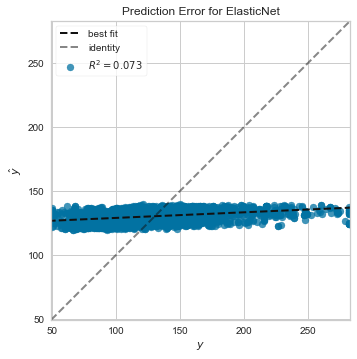

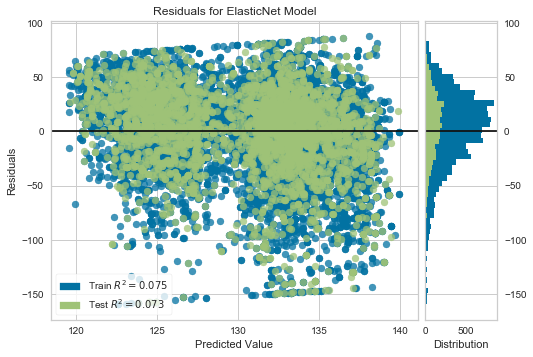

In [4]:
# ElasticNet:

from sklearn.linear_model import ElasticNet

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('ElasticNet', ElasticNet())] #Parameter checken. alpha=0.1, l1_ratio=0.5, tol=0.9

pipeline = Pipeline(steps)

ElasticNet_scaled = pipeline.fit(X_train, y_train)
y_pred = ElasticNet_scaled.predict(X_test)

metric_ElasticNet = total_validation(y_test, y_pred)

print(metric_ElasticNet)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                value
MAE             20.65
MAPE (%)        17.20
MSE            933.72
RMSE (Units)    30.56
r-squared (%)   41.57


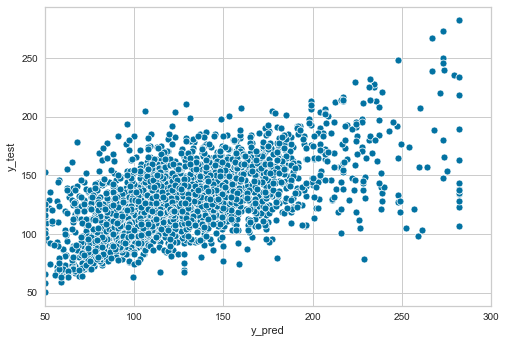

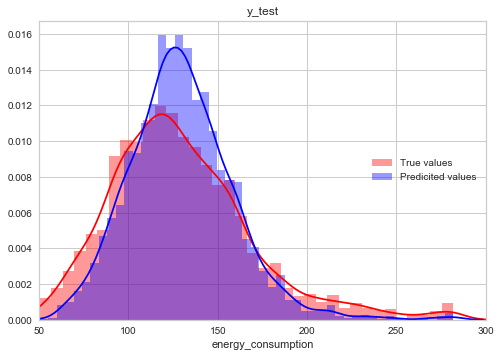

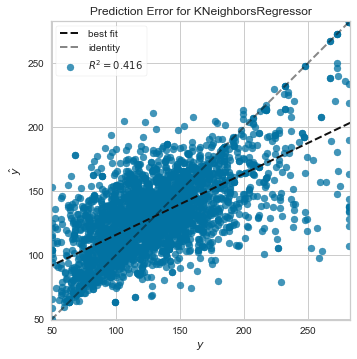

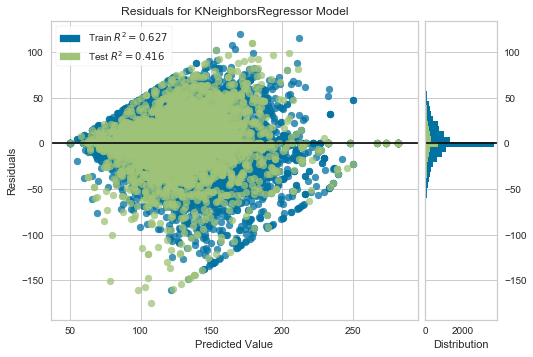

In [5]:
# K NeighborsReg:

from sklearn.neighbors import KNeighborsRegressor

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('KNReg', KNeighborsRegressor())]

pipeline = Pipeline(steps)

KNReg_scaled = pipeline.fit(X_train, y_train)
y_pred = KNReg_scaled.predict(X_test)

metric_KNReg = total_validation(y_test, y_pred)

print(metric_KNReg)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                 value
MAE              16.59
MAPE (%)         13.65
MSE            1052.29
RMSE (Units)     32.44
r-squared (%)    34.15


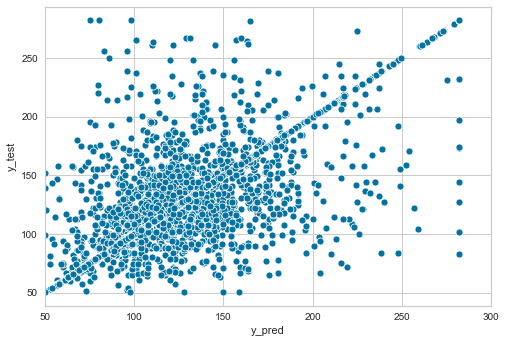

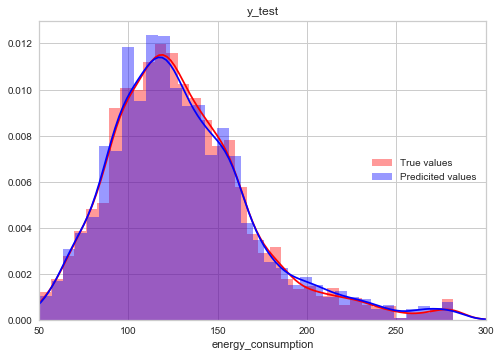

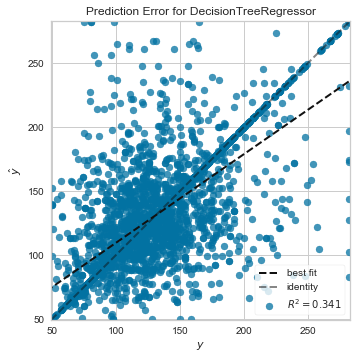

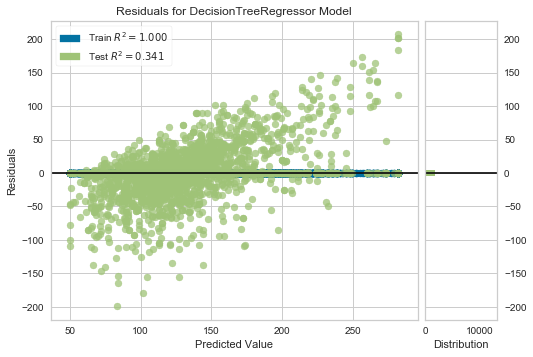

In [6]:
# DTReg:

from sklearn.tree import DecisionTreeRegressor

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('DTReg', DecisionTreeRegressor())]

pipeline = Pipeline(steps)

DTReg_scaled = pipeline.fit(X_train, y_train)
y_pred = DTReg_scaled.predict(X_test)

metric_DTReg = total_validation(y_test, y_pred)

print(metric_DTReg)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show()  

                 value
MAE              25.47
MAPE (%)         20.65
MSE            1272.69
RMSE (Units)     35.67
r-squared (%)    20.35


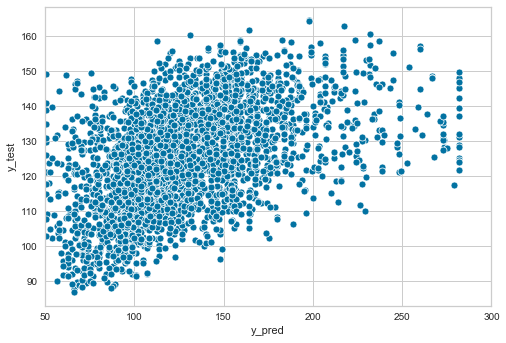

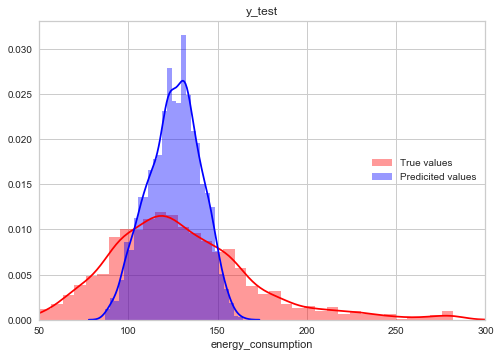

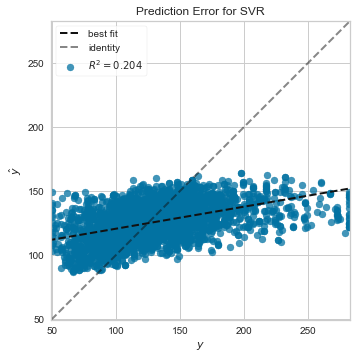

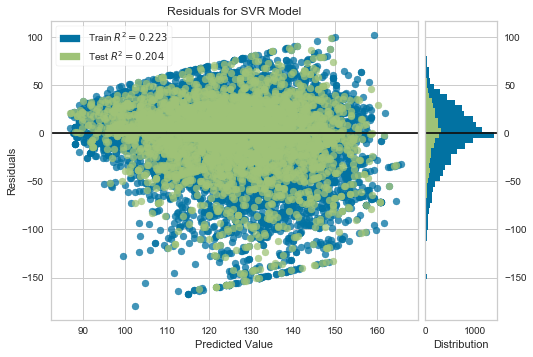

In [7]:
# SVMReg:

from sklearn.svm import SVR

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('SVMReg', SVR())]

pipeline = Pipeline(steps)

SVMReg_scaled = pipeline.fit(X_train, y_train)
y_pred = SVMReg_scaled.predict(X_test)

metric_SVMReg = total_validation(y_test, y_pred)

print(metric_SVMReg)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                value
MAE             17.47
MAPE (%)        14.70
MSE            733.26
RMSE (Units)    27.08
r-squared (%)   54.11


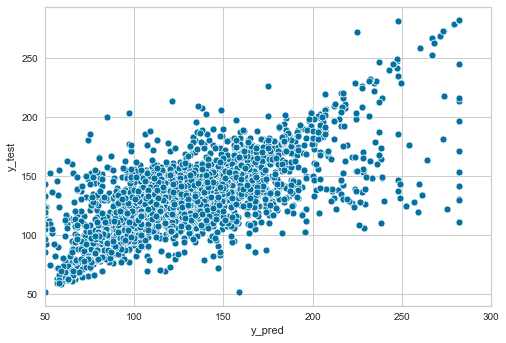

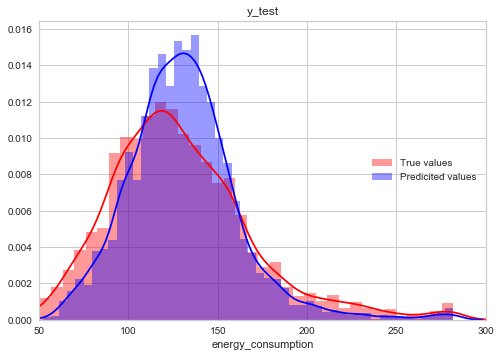

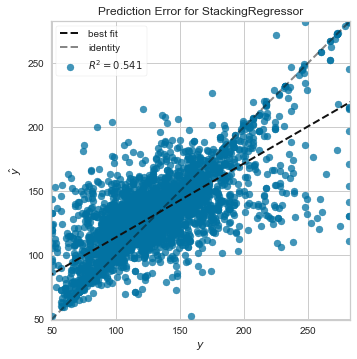

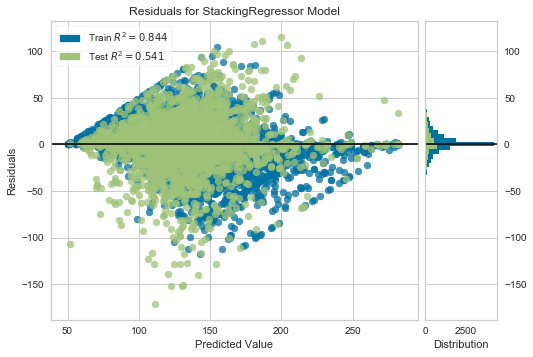

In [8]:
# Stacker:

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

estimators = [
    ('LinReg', LinearRegression()),
    ('ElasticNet', ElasticNet()),
    ('KNReg', KNeighborsRegressor()),
    ('DTReg', DecisionTreeRegressor(random_state=42)),
    ('SVMReg', SVR())
]

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('Stacker', StackingRegressor(
    estimators = estimators,
    final_estimator = RandomForestRegressor(random_state=42)))]

pipeline = Pipeline(steps)

stacker_scaled = pipeline.fit(X_train, y_train)
y_pred = stacker_scaled.predict(X_test)

metric_Stacker = total_validation(y_test, y_pred)

print(metric_Stacker)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

In [9]:
metric_all = pd.concat([metric_LinReg, metric_ElasticNet, metric_KNReg, metric_DTReg, metric_SVMReg,metric_Stacker], axis=1)
metric_all.columns = ['LinReg','ElasticNet','KNReg','DTReg','SVMReg','Stacker']

print(metric_all)

                LinReg  ElasticNet   KNReg    DTReg   SVMReg  Stacker
MAE              25.51       29.18   20.65    16.59    25.47    17.47
MAPE (%)         21.35       24.97   17.20    13.65    20.65    14.70
MSE            1196.49     1481.84  933.72  1052.29  1272.69   733.26
RMSE (Units)     34.59       38.49   30.56    32.44    35.67    27.08
r-squared (%)    25.12        7.26   41.57    34.15    20.35    54.11


                value
MAE             13.95
MAPE (%)        11.69
MSE            506.39
RMSE (Units)    22.50
r-squared (%)   68.31


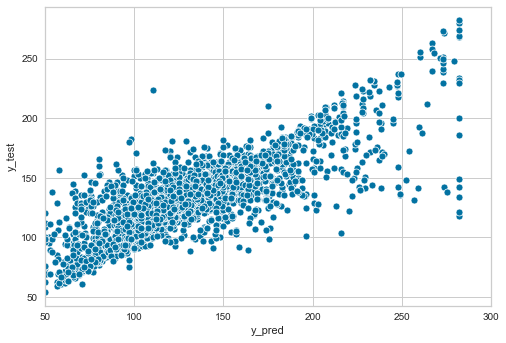

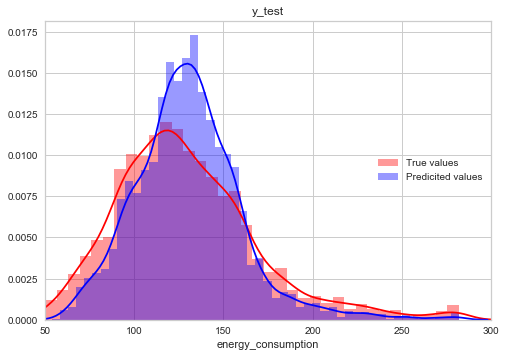

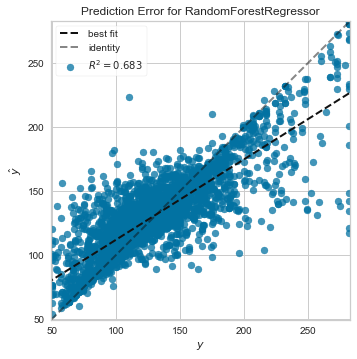

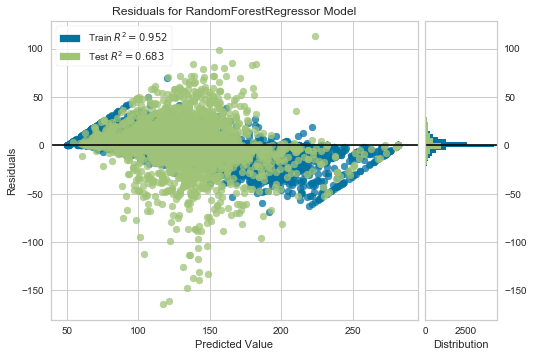

In [10]:
# RandomForestReg:

from sklearn.ensemble import RandomForestRegressor

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('RFReg', RandomForestRegressor(random_state=42))]

pipeline = Pipeline(steps)

RFReg_scaled = pipeline.fit(X_train, y_train)
y_pred = RFReg_scaled.predict(X_test)

metric_RFReg = total_validation(y_test, y_pred)

print(metric_RFReg)

_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values')
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

                 value
MAE              29.79
MAPE (%)         25.46
MSE            1534.28
RMSE (Units)     39.17
r-squared (%)     3.98


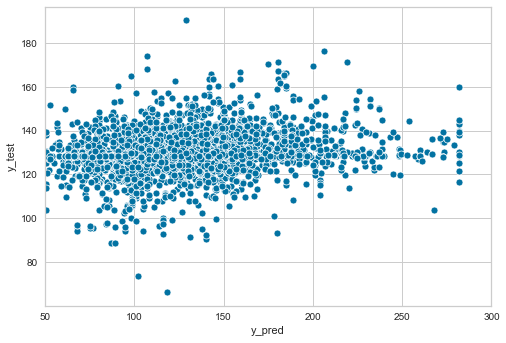

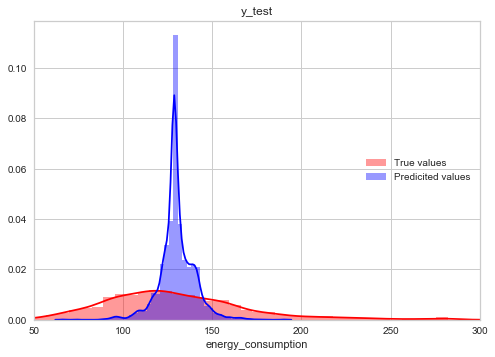

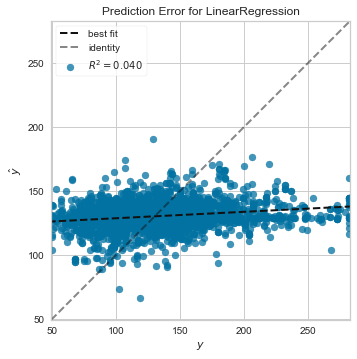

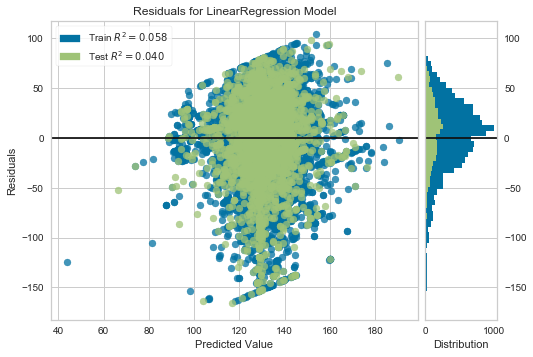

In [11]:
# TEST MIT AUSSCHLIEßLICH NLP-Daten:

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from validation_metric import total_validation
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError


#load data
df = pd.read_csv("C:/Users/test/Documents/GitHub/bachelorarbeit/_climate_change_mitigation/data/processed/berlin_preprocessed.csv")

# Drop 'cost_total' due to high correlation -> colliniarity?
df = df.drop('cost_total', axis=1)

# split data
X = df.iloc[:,82:150]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LinReg:

from sklearn.linear_model import LinearRegression

steps = [
    ('scaler', StandardScaler()),
    ('normalizer', MinMaxScaler()),
    ('LinReg', LinearRegression())]

pipeline = Pipeline(steps)

LinReg_scaled = pipeline.fit(X_train, y_train)
y_pred = LinReg_scaled.predict(X_test)

metric_LinReg = total_validation(y_test, y_pred)

print(metric_LinReg)


_ = sns.scatterplot(y_test, y_pred)
_ = plt.xlim(50, 300)
_ = plt.ylabel('y_test')
_ = plt.xlabel('y_pred')
plt.show()

_ = sns.distplot(y_test, color = 'red', label = 'True values') #, rug=True
_ = sns.distplot(y_pred, color = 'blue', label = 'Predicited values')
_ = plt.title('y_test')
_ = plt.legend(loc = 7)
_ = plt.xlim(50, 300)
plt.show()

visualizer = PredictionError(pipeline)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show() 

In [12]:
df.iloc[:,82:100].describe()

,650,858,856,855,854,853,852,851,850,849,847,846,845,844,843,842,859,860
count,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000,16911.000000
mean,0.006238,0.002298,0.001879,0.002406,0.012841,0.001734,0.002616,0.002047,0.001521,0.004041,0.001875,0.001785,0.005185,0.002357,0.001888,0.001859,0.010058,0.002773
std,0.026953,0.020276,0.018574,0.021364,0.032840,0.016620,0.019225,0.019053,0.014963,0.024247,0.017041,0.018480,0.028390,0.017978,0.016422,0.019946,0.035930,0.021558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.293219,0.409972,0.272622,0.320014,0.352534,0.297218,0.467040,0.409755,0.343631,0.304319,0.274466,0.375208,0.639976,0.268502,0.250478,0.458001,0.443459,0.340832


In [13]:
y_pred

array([128.52778841, 128.52778841, 122.1298744 , ..., 128.52778841,
       129.69028495, 128.7316777 ])